In [76]:
# import necessary packages
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib  inline
pal = sns.set_palette(sns.color_palette("OrRd_r", 8))

In [6]:
# read in all three csv files
df_full = pd.read_csv('Recipes_Full.csv', index_col = 'Unnamed: 0')
df_cat = pd.read_csv('Recipes_Categories.csv', index_col = 'Unnamed: 0')
df_ingr = pd.read_csv('Recipes_Ingredients.csv', index_col = 'Unnamed: 0')

In [7]:
df_full.head()

,Title,Rating,Rating Group,Calories,Protein,Fat,Sodium,22-Minute Meals,3-Ingredient Recipes,Advance Prep Required,...,Whiskey,White Wine,Whole Wheat,Wild Rice,Wine,Wok,Yellow Squash,Yogurt,Yuca,Zucchini
0,"Lentil, Apple, and Turkey Wrap",2.500,2-3,426.0,30.0,7.0,559.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,4-5,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,3-4,165.0,6.0,7.0,165.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,4-5,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,3-4,547.0,20.0,32.0,452.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Nutritional Data

We're provided with data on 'Calories', 'Protein', 'Fat', 'Sodium'. Let's see what the distribution of these variables are and if we can glean any insights from them. We will first study all the data together, and then by rating group to see if there's any variety.

In [99]:
# create nutritional_info list for easy extraction in for loops
nutritional_info = ['Calories', 'Protein', 'Fat', 'Sodium']

# pull summary statistics for nutritional info
df_full.describe()[nutritional_info].round(2)

,Calories,Protein,Fat,Sodium
count,15935.00,15890.00,15869.00,15933.00
mean,6322.96,100.16,346.88,6225.97
std,359046.04,3840.32,20456.11,333318.19
min,0.00,0.00,0.00,0.00
25%,198.00,3.00,7.00,80.00
50%,331.00,8.00,17.00,294.00
75%,586.00,27.00,33.00,711.00
max,30111218.00,236489.00,1722763.00,27675110.00


We have absurdly large max values and standard deviations because of some incorrectly scraped data. Let's look violin plots of our data.

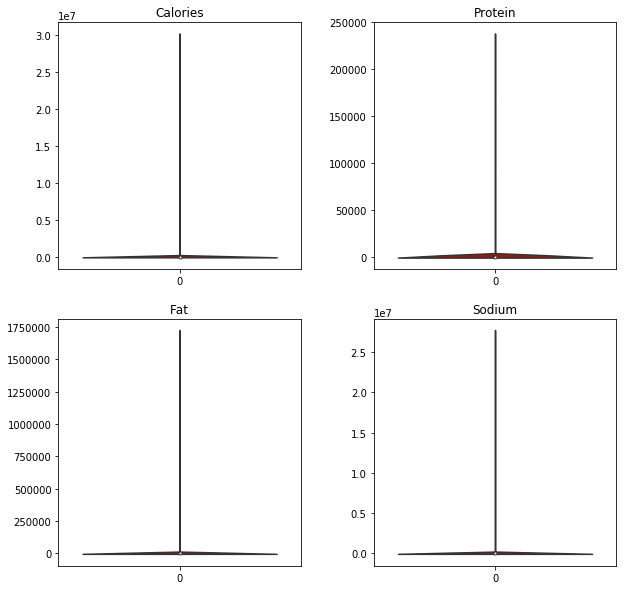

In [107]:
# violin plots for nutritional info
fig = plt.figure()
for k in range(4):    
    ax = fig.add_subplot(2,2,k+1)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.subplots_adjust(wspace=.3)
    
    col = nutritional_info[k]
    sns.violinplot(data = df_full[col], orient='v')
    ax.set_title(nutritional_info[k])
    
# note 'Calories' and 'Sodium' are plotted with scientific notation

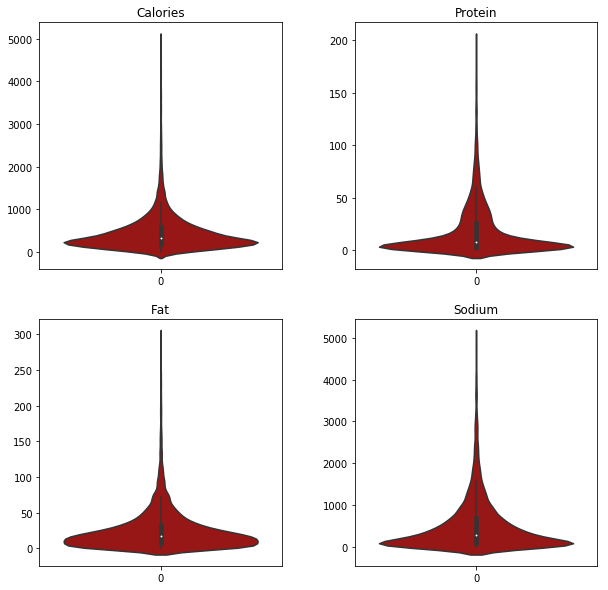

In [125]:
# we shouldn't include these outliers in our analysis

# keep limits in list for easy access
nutr_info_lim = [5000, 200, 300, 5000]

# violin plots for nutritional info
fig = plt.figure()
for k in range(4):    
    ax = fig.add_subplot(2,2,k+1)
    fig.set_figheight(10)
    fig.set_figwidth(10)
    fig.subplots_adjust(wspace=.3)
    
    col = nutritional_info[k]
    sns.violinplot(data = df_full.loc[df_full[col] < nutr_info_lim[k]][col], orient='v')
    ax.set_title(nutritional_info[k])

We can see that a lot of our data is grouped within the 25% and 75% quartiles. Let's see how our data looks split up into rating groupings. This will also solidify what we should set our max limits to.

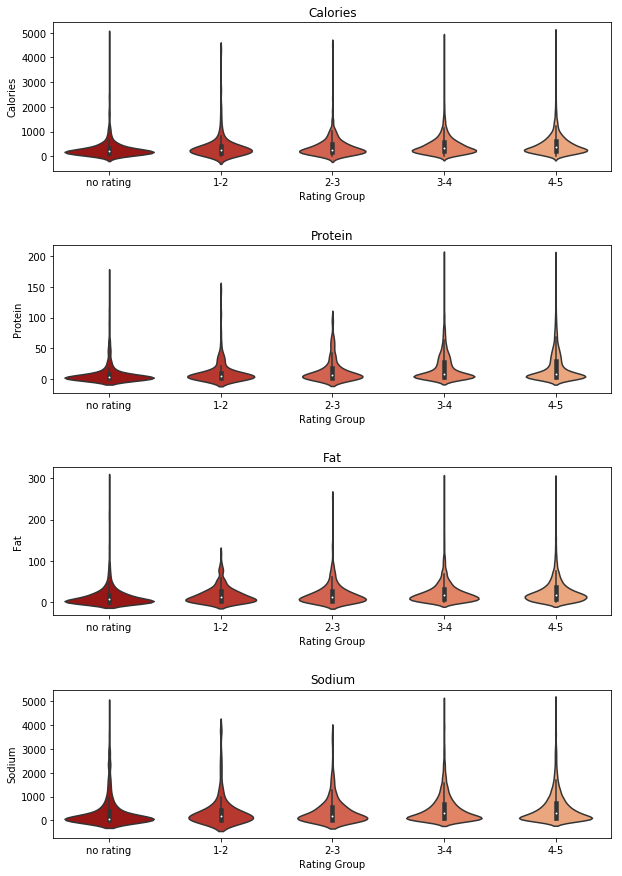

In [143]:
fig = plt.figure()
for k in range(4):    
    ax = fig.add_subplot(4,1,k+1)
    fig.set_figheight(15)
    fig.set_figwidth(10)
    fig.subplots_adjust(hspace=.5)
    
    col = nutritional_info[k]
    sns.violinplot(x='Rating Group', y=col, data=df_full.loc[df_full[col] < nutr_info_lim[k]], 
                   orient='v', order=['no rating', '1-2', '2-3', '3-4', '4-5'])
    ax.set_title(nutritional_info[k])

## Frequencies

Next, let's study how often certain fields show up.

### Ratings

In [149]:
# retreive summary statistics for ratings
df_full.describe()['Rating']

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: Rating, dtype: float64

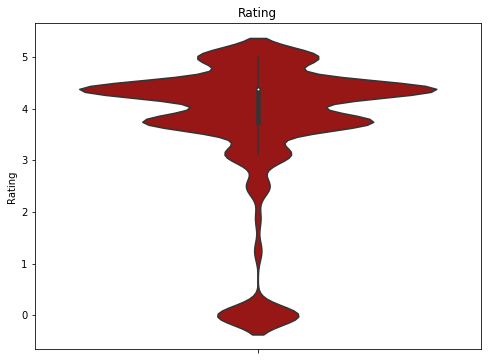

In [148]:
# violin plot for rating
fig = plt.figure(figsize=(8,6))
fig = sns.violinplot(y='Rating', data=df_full, orient='v')
fig.set_title('Rating')

Most ratings are quite high, or there are no ratings at all. This is a sign that most recipes are enjoyed by Epicurious users. When offering meals in their meal kit service, they should consider just using recipes whose average rating falls above the mean (at least when first starting out the business).

### Categories

In [173]:
# create a dataframe of boolean weather columns
df_cat.loc[:,'22-Minute Meals':]

# calculate how many of each weather condition appears in our dataset
cat_count = df_cat.loc[:,'22-Minute Meals':].sum().reset_index(
    name='count').sort_values('count', ascending=False)
cat_count.head(20)

,index,count
17,Bon Appétit,9355.0
165,Peanut Free,8390.0
213,Soy Free,8088.0
235,Tree Nut Free,7044.0
238,Vegetarian,6846.0
110,Kosher,6175.0
168,Pescatarian,6042.0
181,Quick & Easy,5372.0
244,Wheat/Gluten-Free,4906.0
11,Bake,4413.0


Insights: Category Groupings

* **Allergies** - There are quite a few categories that are formatted as '(ingredient) less'. Of the most common food allergens (aka 'The Top 8'), six of them are included above. 
* **Dietary Restrictions** - People don't eat certain foods for various reasons. Whether it's for religious, animal-welfare, health, or any other reasons, users are looking for recipes that fit their preferences. Note: there is overlap between some of these categories (for example, vegetarians and pescetarians).
* **Seasonal** - This is a category grouping that I wasn't expecting to see, but our outcome suggest that users are interested in eating foods that are in season.

These observations highlight the importance of providing customers with the option to state their dietary restrictions and allergies. Also that it might be useful to provide customers with certain recommendations depending on the season.

I predict that we'll see some clusters emerge based on these category groupings.